# Lecture 42

This lecture continues with Energy Balance example problems.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

## Energy Balances on Ideal Reactors

### Batch Reactor

The material balance for species j in a well-mixed batch reactor is:

$$\frac{dN_j}{dt} = R_jV$$

In cases where we have either an incompressible fluid or our reactor operates at constant pressure, the energy balance on a batch reactor is:

$$\sum_j N_j \bar{C}_{p,j} \frac{dT}{dt} = -\sum_i \Delta H_{i} r_i V + \dot{Q}$$

A few notation conventions:  the bar over a property here means it is an intensive molar property for a species and it has units of "per mole".  $\dot{Q}$ is the rate of heat exhange with the surroundings.  It is given by:

$$\dot{Q} = UA(T_a - T)$$

### CSTR

The material balance for species j in a CSTR is:

$$\frac{dN_j}{dt} = F_{jf} - F_j + R_jV$$

If we have an incompressible fluid or a reactor operating at constant pressure, the energy balance on a CSTR is:

$$\sum_j N_j \bar{C}_{p,j} \frac{dT}{dt} = -\sum_i \Delta H_{i} r_i V + \sum_j F_{jf}(\bar{H}_{jf} - \bar{H}_j) + \dot{Q}$$

The rate of heat exchange is the same as in a batch reactor:

$$\dot{Q} = UA(T_a - T)$$

### PFR

The material balance for species j in a PFR is:

$$\frac{dF_j}{dV} = R_j$$

If we have an ideal gas or a reactor operating without a pressure drop, the energy balance for a PFR is:

$$\sum_j F_j \bar{C}_{p,j} \frac{dT}{dV} = -\sum_i \Delta H_{i} r_i + \dot{q}$$

For a PFR, we express the rate of heat transfer per unit volume, and it has a symbol $\dot{q}$:

$$\dot{q} = Ua(T_a - T)$$

## Example Problem 01

(Fogler, Example 12.5) 
	
This example considers non-isothermal operation of a PFR with multiple reactions.  Specifically, the following two gas phase reactions:

\begin{align}
    A &\longrightarrow B\\
    2A &\longrightarrow C
\end{align}

Where both reactions have elementary rate laws. Pure A ($C_{Af} = 0.1$ moles per liter) is fed to the reactor at a rate of 100 moles per second and a temperature of 150$^\circ$C.  We additionally are provided the following information:

\begin{align}		
    k_{10}  &= 10 \ \textrm{s}^{-1}  		    					               \\
    k_{20}  &= 0.045 \ \textrm{L} \ \textrm{mol}^{-1} \ \textrm{s}^{-1}	           \\
    \frac{E_{A1}}{R}  &= 4000 \ \textrm{K}				    		               \\
    \frac{E_{A2}}{R}  &= 9000 \ \textrm{K} 							               \\
    \Delta H_{10} &= -20000 \ \textrm{J} \ \textrm{mol}^{-1}  		               \\ 
    \Delta H_{20} &= -120000 \ \textrm{J} \ \textrm{mol}^{-1}                      \\ 
    C_{PA} &= 90 \ \textrm{J} \ \textrm{mol}^{-1} \ \textrm{K}^{-1}                \\
    C_{PB} &= 90 \ \textrm{J} \ \textrm{mol}^{-1} \ \textrm{K}^{-1}                \\
    C_{PC} &= 180 \ \textrm{J} \ \textrm{mol}^{-1} \ \textrm{K}^{-1}               \\
    Ua &= 4000  \ \textrm{J} \ \textrm{L}^{-1} \ \textrm{s}^{-1} \ \textrm{K}^{-1} \\
    T_{a} &= 100^\circ\textrm{C}
\end{align}

**Note:** reported rate constants were measured at 300K

Assume this PFR has a total volume $V = 1.0 \ \mathrm{L}$ ; plot the molar flowrates of all species as well as the temperature as a function of reactor volume.

### Solution to Example Problem 01

We are asked to plot the flowrate of each species and the temperature as a function of reactor volume.  Clearly, we need to write material and energy balances.

For this system, we have 3 species, so we write 3 material balances:

\begin{align}
    \frac{dF_A}{dV} = R_A \\
    \frac{dF_B}{dV} = R_B \\
    \frac{dF_C}{dV} = R_C \\
\end{align}

We also write an energy balance on the reactor:

$$\frac{dT}{dV} = \frac{-\sum_i \Delta H_i r_i + \dot{q}}{\sum_j F_j \bar{C}_{p,j}}$$

Now we just specify everything on the right hand side of those ODEs in terms of constants, the 4 dependent variables, or volume (our independent variable).

Production rates:

\begin{align}
    R_A &= -r_1 - 2r_2 \\
    R_B &= r_1 \\
    R_C &= r_2 \\
\end{align}

Rate expressions:

\begin{align}
    r_1 &= k_1C_A\\
    r_2 &= k_2{C_A}^2
\end{align}

Concentration of A:

$$C_A = \frac{F_A}{Q}$$

Use an equation of state to define Q:

$$Q = \frac{F_TRT}{P}$$

Where R and P are both constant and expressed in appropriate units, and T is a state variable in the ODE system.  We define total molar flowrate in terms of individual species:

$$F_T = F_A + F_B + F_C$$

Next, we need to define our rate constants as functions of temperature; we do so using a van't Hoff type expression (since we are given rate constants measured at a specific temperature).

\begin{align}
    k_1 &= k_{10}\exp\left[-\frac{E_{A1}}{R}\left(\frac{1}{T} - \frac{1}{T_0}\right)\right] \\
    k_2 &= k_{20}\exp\left[-\frac{E_{A2}}{R}\left(\frac{1}{T} - \frac{1}{T_0}\right)\right] \\
\end{align}

We also need to know the heats of reaction at the reaction temperature in order to complete the material balance.  We know that, generally:

$$\Delta H(T) = \Delta H^\circ + \int_{T_0}^{T} \Delta C_p dT$$

For both of these reactions, we find that $\Delta C_p = 0$, so we conclude that heats of reaction are temperature independent here.

This is a non-isothermal reactor with heat exchange; we calculate the rate of heat exchange per unit volume ($\dot{q}$) as follows:

$$\dot{q} = Ua(T_a - T)$$

Where the temperature of the heat exchange fluid ($T_a$) and the product of the heat transfer coefficient (U) and the surface area-per-volume (a) are given in the problem statement.

That should be it.  ODE system is fully specified and can be solved.

In [2]:
def P01(V, var):
   
    #Fixed values from problem statement
    Tf   = 150 + 273 #K
    Cf   = 0.1 #mol/L
    R    = 0.08206 #L*atm/mol/K
    Pf   = Cf*R*Tf #atm
    P    = Pf #atm
    k10  = 10 #1/s
    k20  = 0.045 #L/mol/s
    DH1  = -20000 #J/mol
    DH2  = -120000 #J/mol
    EAR1 = 4000 #K
    EAR2 = 9000 #K
    CPA  = 90 #J/mol/K
    CPB  = 90 #J/mol/K
    CPC  = 180 #J/mol/K
    Ua   = 4000 #J/L/K/s
    Ta   = 100+273 #K
    T0   = 300 #K
    
    #Quantities changing as a function of reactor volume.
    FA = var[0]
    FB = var[1]
    FC = var[2]
    T  = var[3]
    FT = FA + FB + FC #mol/s
    Q  = FT*R*T/P     #L/s
    
    CA = FA/Q         #mol/L
    
    k1 = k10*np.exp(-EAR1*(1/T - 1/T0)) #1/s
    k2 = k20*np.exp(-EAR2*(1/T - 1/T0)) #L/mol/s
    
    r1 = k1*CA     #mol/L/s
    r2 = k2*CA**2  #mol/L/s
    
    RA = -r1 - 2*r2  #mol/L/s
    RB =  r1         #mol/L/s
    RC =  r2         #mol/L/s
    
    qdot = Ua*(Ta - T) #J/L/s
    
    DT = (-1*(DH1*r1 + DH2*r2) + qdot)/(FA*CPA + FB*CPB + FC*CPC)
    
    D1 = RA
    D2 = RB
    D3 = RC
    D4 = DT
    
    return [D1, D2, D3, D4]

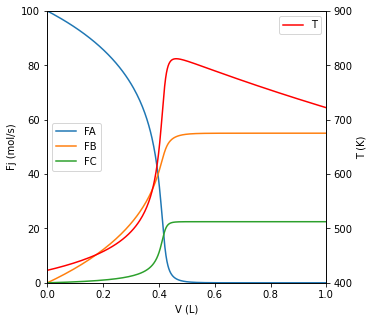

In [3]:
FAf  = 100 #mol/s
FBf  = 0
FCf  = 0
Tf   = 150 + 273 #K
var0 = [FAf, FBf, FCf, Tf]
vspan = (0.0, 1.0) #L
ans   = solve_ivp(P01, vspan, var0, atol = 1e-10, rtol = 1e-10)

V             = ans.t
FA, FB, FC, T = ans.y

fig1, ax1 = plt.subplots(figsize = (5, 5))
ax2 = ax1.twinx()
ax1.plot(V, FA, label = 'FA')
ax1.plot(V, FB, label = 'FB')
ax1.plot(V, FC, label = 'FC')
ax2.plot(V, T,  color = 'red', label = 'T')

ax1.set_xlim(0.0, 1.0)
ax1.set_ylim(0, 100)
ax2.set_ylim(400, 900) 

ax1.set_xlabel('V (L)')
ax1.set_ylabel('Fj (mol/s)')
ax2.set_ylabel('T (K)')

ax1.legend(loc = 'center left')
ax2.legend(loc = 'upper right')